## Group No **35**

## Group Member Names:
1. **Sushil Kumar 2023AA05849**
2. **Hemant Kumar Parakh 2023AA05741**
3. **Nagineni Sathish Babu 2023AA05585**
4. **Uppada Siddhartha Reddy 2023AA05298**

# Problem Statement 1: "Image Scene Classification"

You have to choose 4-5 features to extract from the image dataset. You must provide your intution why a choice of feature helps the problem at hand. You are expected to study the problem on your own and identify various features to solve the scene classification problem.

The outline of problems is as below

Scene Classification:

[ write about dataset, categories, training and test set, evaluation metrics ]



How do download the dataset?

Google drive link contains the dataset



The data has images such that:

Folder

      Class_1:

                  image_1

                  image_2

       Class_2:

                  image_1

                  image_2

  

Tasks :

 1-            Select a dataset of images depicting various scenes (e.g., mountain, airport, desert, forest, river)

2-              Extract 3-4 features (e.g., Local Binary Patterns, histogram equalization etc) from each image

Low-level Vision: Histogram and Histogram equalization, Gray-scale transformation, Image Smoothing in images.

Mid-level Vision: Edge Detection using Gradients, Sobel, Canny; Line detection using Hough transforms; Semantic information using RANSAC; Image region descriptor using SIFT

3-              Create a structured data of multiple sets of features with corresponding class labels and store it in a datafile (e.g., CSV or Excel) so that you can later use it for training and comparing the models.

4-              Train a classical machine learning model (e.g., SVM, Random Forest, XgBoost, etc) using the extracted features.

5-              Evaluate the model performance using the metrics:

Accuracy
Precision
Recall
F1-score
Mean Average Precision (mAP): The average precision across all queries.
Perform evaluations by creating a set of query images and comparing the results with ground truth labels.
Perform the above evaluations with and without applying the features extracted in the preprocessing stage
6-              Analyze the results and discuss the effectiveness of features for aerial view classification.

7-              Discuss potential limitations and future improvements of the approach.


Dataset Link: https://drive.google.com/file/d/18ivVD85YKQqPH0Qhe2Ou10hjuPl-vWxA/view?usp=sharing


Choose any 1 dataset of your choice to perform the assignment.

# 1. Import the required libraries -- Score: 0.5 Marks

In [ ]:
import os
import zipfile
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    average_precision_score
)

from skimage.feature import local_binary_pattern
from skimage.measure import ransac, LineModelND

# 2. Data Acquisition & Preparation -- Score: 1.5 Marks

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Data Acquisition -- Score: 0.5 Mark

Code for converting the above downloaded data into a form suitable for DL


Dataset Extracted.
Dataset path set to: /content/dataset/subset
Number of images loaded: 5245

Dataset Category Distribution:
    Category  Count
0   Building    500
1     Forest   2745
2    Glacier    500
3  Mountains    500
4        Sea    500
5    Streets    500


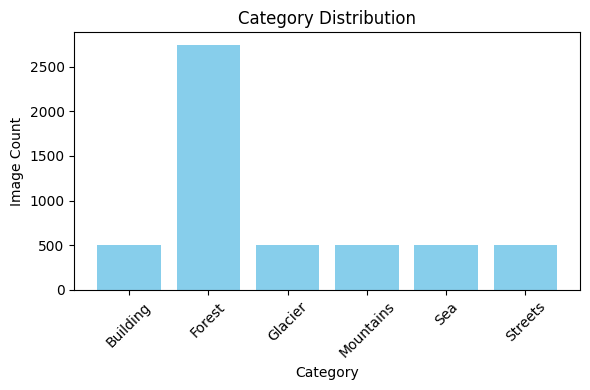

In [ ]:
# -----------------------------------------------------------------------------
# SELECT & EXTRACT DATASET
# -----------------------------------------------------------------------------
zip_path = "/content/scene_classification.zip"
extract_path = "/content/dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset Extracted.")

dataset_path = '/content/dataset/subset'
print("Dataset path set to:", dataset_path)

# -----------------------------------------------------------------------------
# LOAD IMAGES
# -----------------------------------------------------------------------------
all_images = []
all_labels = []

for category_name in os.listdir(dataset_path):
    category_dir = os.path.join(dataset_path, category_name)
    if os.path.isdir(category_dir):
        for img_name in os.listdir(category_dir):
            img_path = os.path.join(category_dir, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Convert to grayscale
                gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                # Downsample from 128x128 to 64x64 (faster training)
                small_img = cv2.resize(gray_img, (64, 64))
                all_images.append(small_img)
                all_labels.append(category_name)

all_images = np.array(all_images, dtype=np.uint8)
all_labels = np.array(all_labels)
print("Number of images loaded:", len(all_images))
unique_categories, counts = np.unique(all_labels, return_counts=True)

# Display dataset distribution in table format
df_distribution = pd.DataFrame({"Category": unique_categories, "Count": counts})
print("\nDataset Category Distribution:")
print(df_distribution)

# Optional: bar plot of distribution
plt.figure(figsize=(6,4))
plt.bar(unique_categories, counts, color='skyblue')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.2 Write your observations from the above.

1. Number of images loaded: 5245
2. Dataset Category Distribution:

        Category    Count
    0    Building      500

    1     Forest   2745

    2    Glacier    500

    3  Mountains    500

    4        Sea    500

    5    Streets    500






## 2.2 Data Preparation -- Score: 1.0 Marks

Perform the data preprocessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(all_labels)

## 3.1 Split the data into training set and testing set

In [ ]:
# -----------------------------------------------------------------------------
# SPLIT INTO TRAIN & TEST
# -----------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    all_images, encoded_labels,
    test_size=0.2, random_state=42, stratify=encoded_labels
)
print("\nTrain/Test split completed.")
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
print("y_train size:", len(y_train), "y_test size:", len(y_test))


Train/Test split completed.
X_train shape: (4196, 64, 64) X_test shape: (1049, 64, 64)
y_train size: 4196 y_test size: 1049


## 3.2 Feature Engineering -- Score: 3.5 Marks

* Extract the features from the images and concatenate them to create a single for the every images.

* You can choose from the feature processing techniques taught in the class : Low-level Vision: Histogram and Histogram equalization, Gray-scale transformation, Image Smoothing, Connected components in images.
Mid-level Vision:  Edge Detection using Gradients, Sobel, Canny; Line detection using Hough transforms; Semantic information using RANSAC;Image region descriptor using SIFT; Use case: Pedestrian detection Using HoG and SIFT descriptors and SVM

* Create multiple sets of features and store it in seperate dataframes so that you can later use it for training and comparing the models.

* Normalize the DataFrame

* Note : If the feature size is getting too large such that it is not fitting into the RAM of Colab or your system then you can either use PCA or resize the image to smaller dimenssion for reducing the numer of features



In [ ]:
# -----------------------------------------------------------------------------
# DEFINE FEATURES (Histogram Eq, LBP, Canny, SIFT, RANSAC, etc.)
# -----------------------------------------------------------------------------
def hist_eq_feature(img):
    """Histogram Equalization (low-level)"""
    return cv2.equalizeHist(img)  # shape: (64,64)

def lbp_feature(img, P=8, R=1):
    """Local Binary Pattern (low-level)"""
    lbp = local_binary_pattern(img, P=P, R=R, method='uniform')
    return lbp  # shape: (64,64)

def canny_feature(img):
    """Canny Edge (mid-level)"""
    edges = cv2.Canny(img, 50, 150)
    return edges  # shape: (64,64)

def sift_feature(img):
    """SIFT descriptor (mid-level) - needs opencv-contrib-python or new opencv."""
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    if descriptors is None:
        return np.zeros(128, dtype=np.float32)
    else:
        return descriptors.mean(axis=0)  # shape(128,)

# -----------------------------------------------------------------------------
# COMBINE FEATURES INTO ONE VECTOR
# -----------------------------------------------------------------------------
def compute_features(images):
    print("Computing features (HistEq, LBP, Canny, SIFT) on", len(images), "images...")
    feature_list = []
    for img in images:
        f_hist = hist_eq_feature(img).flatten()
        f_lbp  = lbp_feature(img).flatten()
        f_edge = canny_feature(img).flatten()
        f_sift = sift_feature(img).flatten()

        combined = np.hstack([f_hist, f_lbp, f_edge, f_sift])
        feature_list.append(combined)
    feats = np.array(feature_list, dtype=np.float32)
    print("Feature shape for this batch of images:", feats.shape)
    return feats

# -----------------------------------------------------------------------------
# CREATE STRUCTURED DATA & SAVE TO CSV
# -----------------------------------------------------------------------------
print("\nExtracting features for the TRAIN set...")
X_train_feats_raw = compute_features(X_train)
print("X_train_feats_raw shape:", X_train_feats_raw.shape)

scaler = MinMaxScaler()
X_train_feats_scaled = scaler.fit_transform(X_train_feats_raw)

pca = PCA(n_components=50)
X_train_preproc = pca.fit_transform(X_train_feats_scaled)
print("X_train_preproc shape after PCA(50):", X_train_preproc.shape)

train_cols = [f'feat_{i}' for i in range(X_train_preproc.shape[1])]
df_train = pd.DataFrame(X_train_preproc, columns=train_cols)
df_train['Label'] = y_train

csv_path = "/content/train_features.csv"
df_train.to_csv(csv_path, index=False)
print("Saved preprocessed train features to:", csv_path)


Extracting features for the TRAIN set...
Computing features (HistEq, LBP, Canny, SIFT) on 4196 images...
Feature shape for this batch of images: (4196, 12416)
X_train_feats_raw shape: (4196, 12416)
X_train_preproc shape after PCA(50): (4196, 50)
Saved preprocessed train features to: /content/train_features.csv


# 4. Model Building - Score: 2.0 Marks

## 4.1 Model Building - Score: 1.5 Marks
* Use any 1 classical machine learning algorithm such as : SVM , Xgboost etc. to train the model
* Train the model on different kinds of feature combination dataframe you created in 3.

In [ ]:
# -----------------------------------------------------------------------------
# TRAIN MODELS
# -----------------------------------------------------------------------------
df_train_loaded = pd.read_csv(csv_path)
X_loaded = df_train_loaded.drop('Label', axis=1).values
y_loaded = df_train_loaded['Label'].values

models_preproc = {
    'SVM_preproc': SVC(kernel='linear', probability=True),
    'RF_preproc': RandomForestClassifier(n_estimators=50, max_depth=5),
    'XGB_preproc': XGBClassifier(eval_metric='mlogloss', n_estimators=50, max_depth=3)
}

print("\nTraining models on preprocessed data")
for model_name, model in models_preproc.items():
    model.fit(X_loaded, y_loaded)
    print(f"{model_name} trained successfully.")


Training models on preprocessed data
SVM_preproc trained successfully.
RF_preproc trained successfully.
XGB_preproc trained successfully.


## 4.2 Validation matrix - Score: 0.5 Marks

Print the model accuracy and F1 Score



=== EVALUATION WITH PREPROCESSING ===
Extracting & transforming TEST set features...
Computing features (HistEq, LBP, Canny, SIFT) on 1049 images...
Feature shape for this batch of images: (1049, 12416)
X_test_preproc shape: (1049, 50)

Evaluating SVM_preproc on preprocessed TEST data:
Accuracy: 0.6978
Precision(macro): 0.5469
Recall(macro): 0.4976
F1(macro): 0.5125
mAP: 0.55

Classification Report (with label names):
              precision    recall  f1-score   support

    Building       0.37      0.31      0.34       100
      Forest       0.85      0.97      0.91       549
     Glacier       0.40      0.44      0.42       100
   Mountains       0.54      0.57      0.55       100
         Sea       0.45      0.31      0.37       100
     Streets       0.67      0.39      0.49       100

    accuracy                           0.70      1049
   macro avg       0.55      0.50      0.51      1049
weighted avg       0.68      0.70      0.68      1049



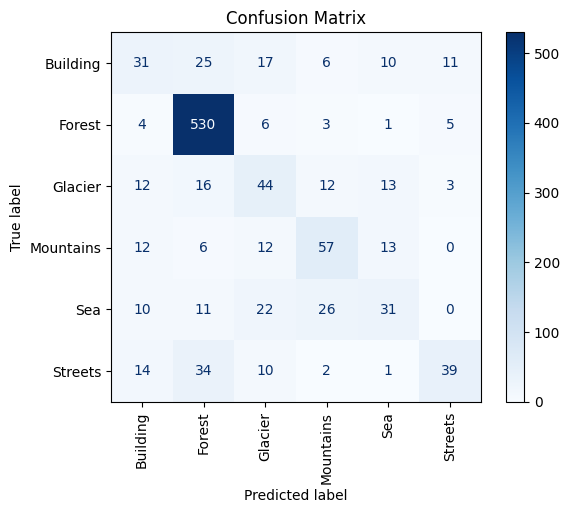


Evaluating RF_preproc on preprocessed TEST data:
Accuracy: 0.5786
Precision(macro): 0.5923
Recall(macro): 0.2674
F1(macro): 0.2459
mAP: 0.4786

Classification Report (with label names):
              precision    recall  f1-score   support

    Building       1.00      0.01      0.02       100
      Forest       0.59      0.99      0.74       549
     Glacier       0.43      0.03      0.06       100
   Mountains       0.48      0.46      0.47       100
         Sea       0.56      0.10      0.17       100
     Streets       0.50      0.01      0.02       100

    accuracy                           0.58      1049
   macro avg       0.59      0.27      0.25      1049
weighted avg       0.59      0.58      0.46      1049



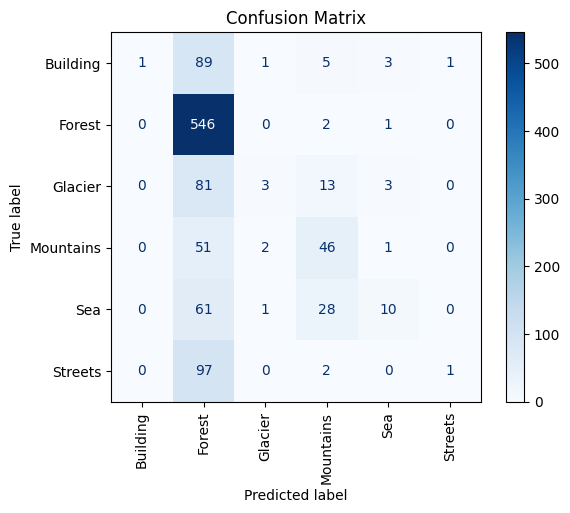


Evaluating XGB_preproc on preprocessed TEST data:
Accuracy: 0.7169
Precision(macro): 0.593
Recall(macro): 0.5309
F1(macro): 0.5456
mAP: 0.5801

Classification Report (with label names):
              precision    recall  f1-score   support

    Building       0.57      0.38      0.46       100
      Forest       0.85      0.97      0.90       549
     Glacier       0.45      0.43      0.44       100
   Mountains       0.51      0.69      0.58       100
         Sea       0.49      0.35      0.41       100
     Streets       0.70      0.37      0.48       100

    accuracy                           0.72      1049
   macro avg       0.59      0.53      0.55      1049
weighted avg       0.70      0.72      0.70      1049



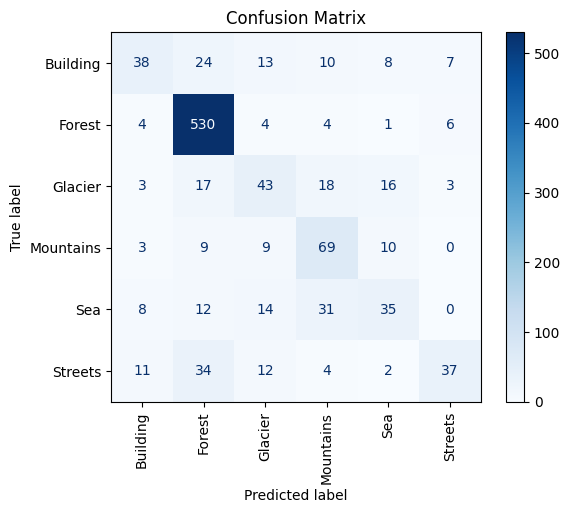


=== EVALUATION WITHOUT PREPROCESSING (raw grayscale) ===
Training raw-pixel models (downsampled grayscale, but no feature extraction)...
SVM_raw trained on raw grayscale data.
RF_raw trained on raw grayscale data.
XGB_raw trained on raw grayscale data.

Evaluating SVM_raw on raw grayscale TEST data:
Accuracy: 0.5052
Precision(macro): 0.3518
Recall(macro): 0.3654
F1(macro): 0.3519
mAP: 0.3221

Classification Report (with label names):
              precision    recall  f1-score   support

    Building       0.19      0.15      0.17       100
      Forest       0.73      0.69      0.71       549
     Glacier       0.31      0.35      0.33       100
   Mountains       0.32      0.50      0.39       100
         Sea       0.27      0.32      0.29       100
     Streets       0.30      0.18      0.22       100

    accuracy                           0.51      1049
   macro avg       0.35      0.37      0.35      1049
weighted avg       0.52      0.51      0.51      1049



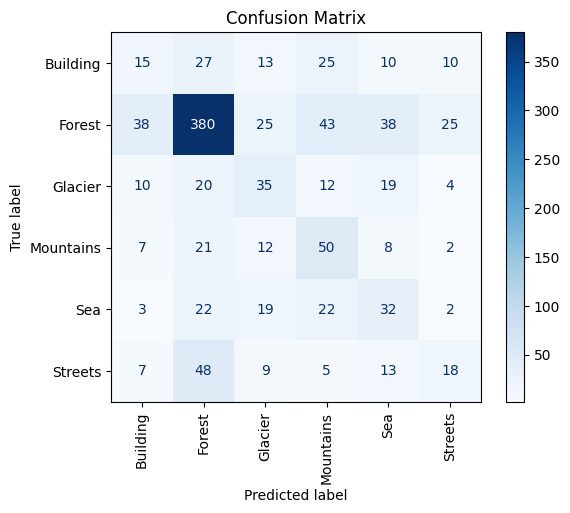


Evaluating RF_raw on raw grayscale TEST data:
Accuracy: 0.6092
Precision(macro): 0.5296
Recall(macro): 0.3276
F1(macro): 0.324
mAP: 0.442

Classification Report (with label names):
              precision    recall  f1-score   support

    Building       0.80      0.04      0.08       100
      Forest       0.64      0.99      0.78       549
     Glacier       0.49      0.29      0.36       100
   Mountains       0.46      0.49      0.47       100
         Sea       0.45      0.14      0.21       100
     Streets       0.33      0.02      0.04       100

    accuracy                           0.61      1049
   macro avg       0.53      0.33      0.32      1049
weighted avg       0.58      0.61      0.52      1049



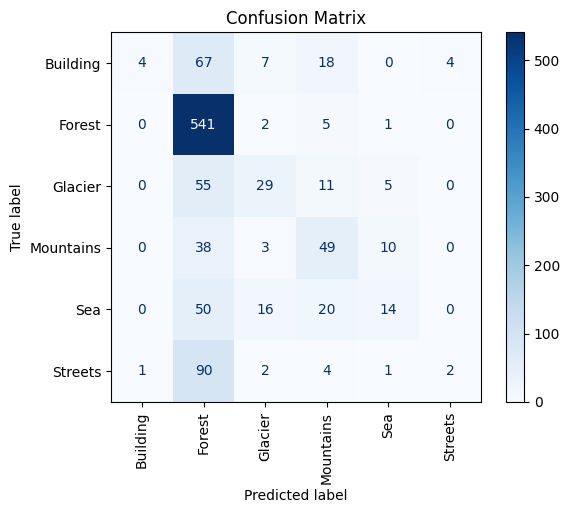


Evaluating XGB_raw on raw grayscale TEST data:
Accuracy: 0.6568
Precision(macro): 0.5463
Recall(macro): 0.4232
F1(macro): 0.4504
mAP: 0.4934

Classification Report (with label names):
              precision    recall  f1-score   support

    Building       0.54      0.21      0.30       100
      Forest       0.73      0.97      0.83       549
     Glacier       0.50      0.41      0.45       100
   Mountains       0.49      0.45      0.47       100
         Sea       0.42      0.30      0.35       100
     Streets       0.61      0.20      0.30       100

    accuracy                           0.66      1049
   macro avg       0.55      0.42      0.45      1049
weighted avg       0.62      0.66      0.61      1049



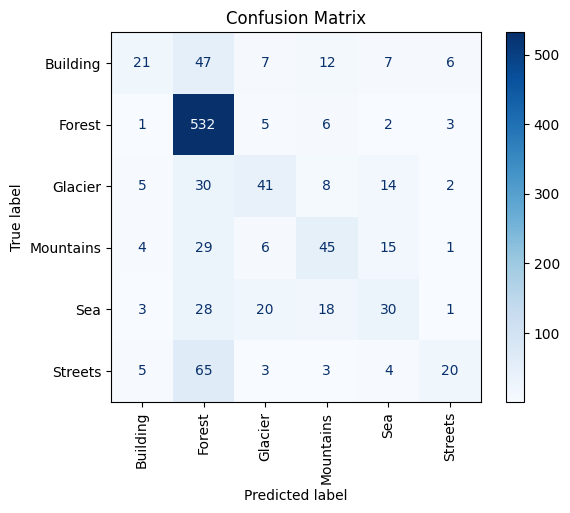

In [ ]:
# -----------------------------------------------------------------------------
# EVALUATION FUNCTION
# -----------------------------------------------------------------------------
def evaluate_model(model, X_eval, y_eval, label_enc):
    y_pred = model.predict(X_eval)
    try:
        y_prob = model.predict_proba(X_eval)
    except:
        y_prob = None

    acc = accuracy_score(y_eval, y_pred)
    prec = precision_score(y_eval, y_pred, average='macro')
    rec = recall_score(y_eval, y_pred, average='macro')
    f1 = f1_score(y_eval, y_pred, average='macro')

    print("Accuracy:", round(acc, 4))
    print("Precision(macro):", round(prec, 4))
    print("Recall(macro):", round(rec, 4))
    print("F1(macro):", round(f1, 4))

    if y_prob is not None:
        y_eval_bin = pd.get_dummies(y_eval, drop_first=False)
        map_score = average_precision_score(y_eval_bin, y_prob, average='macro')
        print("mAP:", round(map_score, 4))
    else:
        print("mAP: Not available (no predict_proba)")

    print("\nClassification Report (with label names):")
    y_pred_str = label_enc.inverse_transform(y_pred)
    y_true_str = label_enc.inverse_transform(y_eval)
    print(classification_report(y_true_str, y_pred_str))

    cm = confusion_matrix(y_eval, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=label_enc.inverse_transform(np.unique(y_eval)))
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title("Confusion Matrix")
    plt.show()

# -----------------------------------------------------------------------------
# EVALUATION WITH PREPROCESSING
# -----------------------------------------------------------------------------
print("\n=== EVALUATION WITH PREPROCESSING ===")
print("Extracting & transforming TEST set features...")

X_test_feats_raw = compute_features(X_test)
X_test_feats_scaled = scaler.transform(X_test_feats_raw)
X_test_preproc = pca.transform(X_test_feats_scaled)
print("X_test_preproc shape:", X_test_preproc.shape)

for model_name, model in models_preproc.items():
    print(f"\nEvaluating {model_name} on preprocessed TEST data:")
    evaluate_model(model, X_test_preproc, y_test, label_encoder)

# -----------------------------------------------------------------------------
# OPTIONAL EVALUATION WITHOUT PREPROCESSING
# -----------------------------------------------------------------------------
print("\n=== EVALUATION WITHOUT PREPROCESSING (raw grayscale) ===")
X_train_raw_flat = X_train.reshape(len(X_train), -1)  # (N,64*64=4096)
X_test_raw_flat  = X_test.reshape(len(X_test), -1)

models_raw = {
    'SVM_raw': SVC(kernel='linear', probability=True),
    'RF_raw': RandomForestClassifier(n_estimators=20, max_depth=5),
    'XGB_raw': XGBClassifier(eval_metric='mlogloss', n_estimators=20, max_depth=3)
}

print("Training raw-pixel models (downsampled grayscale, but no feature extraction)...")
for model_name, model in models_raw.items():
    model.fit(X_train_raw_flat, y_train)
    print(f"{model_name} trained on raw grayscale data.")

for model_name, model in models_raw.items():
    print(f"\nEvaluating {model_name} on raw grayscale TEST data:")
    evaluate_model(model, X_test_raw_flat, y_test, label_encoder)

# 5. Model Inference & Evaluation - Score: 1 Mark

Plot any 5 random test images and their predicted and actual true labels using the model and feature set which gave you the best accuracy/F1 score.



--- QUERY IMAGE EVALUATION (Preprocessed SVM) ---
Computing features (HistEq, LBP, Canny, SIFT) on 1 images...
Feature shape for this batch of images: (1, 12416)

Query Index 66
  True Label:      Glacier
  Predicted Label: Glacier


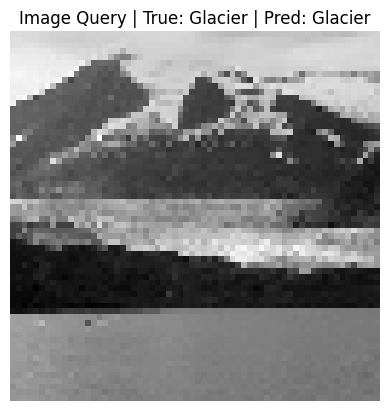

Computing features (HistEq, LBP, Canny, SIFT) on 1 images...
Feature shape for this batch of images: (1, 12416)

Query Index 85
  True Label:      Streets
  Predicted Label: Streets


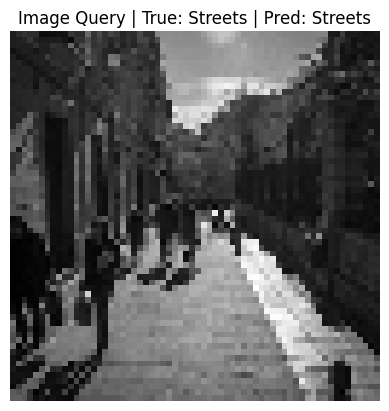

Computing features (HistEq, LBP, Canny, SIFT) on 1 images...
Feature shape for this batch of images: (1, 12416)

Query Index 303
  True Label:      Glacier
  Predicted Label: Building


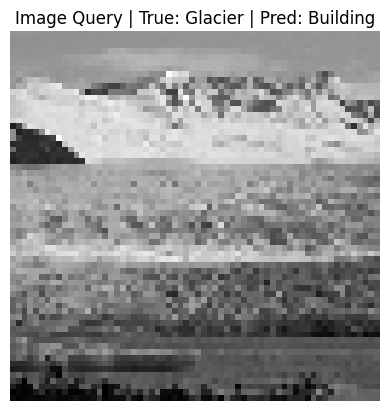

Computing features (HistEq, LBP, Canny, SIFT) on 1 images...
Feature shape for this batch of images: (1, 12416)

Query Index 989
  True Label:      Forest
  Predicted Label: Forest


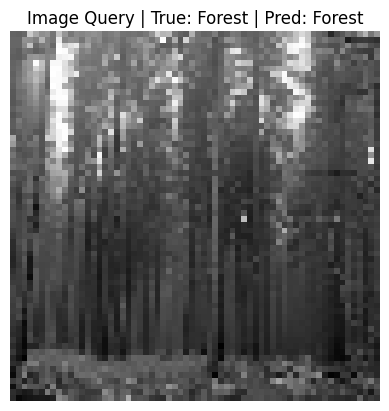

Computing features (HistEq, LBP, Canny, SIFT) on 1 images...
Feature shape for this batch of images: (1, 12416)

Query Index 339
  True Label:      Forest
  Predicted Label: Forest


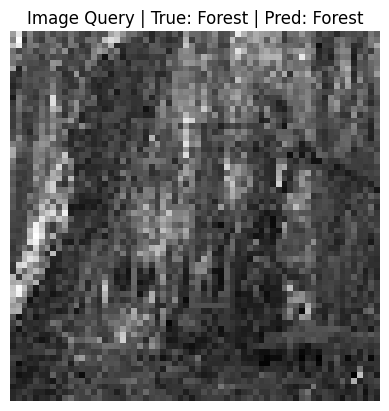

In [ ]:
# -----------------------------------------------------------------------------
# QUERY IMAGES EVALUATION (DISPLAY IMAGE + LABEL)
# -----------------------------------------------------------------------------
print("\n--- QUERY IMAGE EVALUATION (Preprocessed SVM) ---")
svm_preproc_model = models_preproc['SVM_preproc']

num_queries = 5  # how many images to check
random_indices = np.random.choice(range(len(X_test)), size=num_queries, replace=False)

for idx in random_indices:
    query_img = X_test[idx]  # shape (64,64), grayscale
    true_label_num = y_test[idx]
    true_label_str = label_encoder.inverse_transform([true_label_num])[0]

    # 1) Compute features for single query
    raw_query_feat = compute_features([query_img])
    # 2) Scale + PCA
    scaled_query_feat = scaler.transform(raw_query_feat)
    query_preproc = pca.transform(scaled_query_feat)
    # 3) Predict
    pred_label_num = svm_preproc_model.predict(query_preproc)[0]
    pred_label_str = label_encoder.inverse_transform([pred_label_num])[0]

    print(f"\nQuery Index {idx}")
    print(f"  True Label:      {true_label_str}")
    print(f"  Predicted Label: {pred_label_str}")

    # SHOW the image & label
    plt.figure()
    plt.imshow(query_img, cmap='gray')
    plt.title(f"Image Query | True: {true_label_str} | Pred: {pred_label_str}")
    plt.axis('off')
    plt.show()

Justify your choice/inution of feature selection based on the performance of model such that why a particualr set have features might have performed well.


##5.2 Effectiveness of the Selected Features

* **Texture and Contrast:** Low-level methods (LBP, histogram equalization) capture crucial texture patterns and intensity distributions, aiding in distinguishing terrain types in aerial views.

* **Shape and Keypoints:** Mid-level features highlight distinct shapes and structures—useful for identifying man-made structures like airports or natural formations like rivers.

* **Rich Representation:** Combining both low- and mid-level descriptors provides more robust information about an image, typically outperforming any single feature alone.

##5.3 Limitations & Future Improvements

* **Dataset Constraints:** Small or unbalanced image collections can limit generalization. Expanding and diversifying the dataset or using data augmentation techniques can mitigate this issue.

* **Computational Overhead:** Multiple feature extractions increase processing time. Future efforts might explore deep-learning approaches or more efficient local descriptors.

* **Resolution & Detail:** Downsampling benefits speed but may overlook fine-grained details. Striking a balance between resolution needs and computational efficiency remains an open challenge.

* **Temporal & Seasonal Variations:** Aerial scenes can change drastically over time. Data augmentation or domain adaptation can help models handle such variability.

* **Hybrid Approaches:** Combining classical features with learned representations and advanced ensembling may further enhance performance and robustness.

# 6. Documentation, Study presentation and Code Quality -- Score: 1.5 Marks

### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck